In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv("/content/NewYork_Weather_Nov22.csv") 

In [ ]:
df=data

In [ ]:
df.describe

<bound method NDFrame.describe of        City  Avg_Temperature public_opinion      clothing  \
0   NewYork             62.0           warm       t-shirt   
1   NewYork             63.3           warm       t-shirt   
2   NewYork             59.5           warm       t-shirt   
3   NewYork             59.0           warm       t-shirt   
4   NewYork             67.5           warm       t-shirt   
5   NewYork             68.1           warm  full-sleeves   
6   NewYork             69.5           warm       t-shirt   
7   NewYork             52.5       moderate       t-shirt   
8   NewYork             47.5           warm  full-sleeves   
9   NewYork             57.3           warm  full-sleeves   
10  NewYork             65.0           warm       t-shirt   
11  NewYork             66.8           warm       t-shirt   
12  NewYork             50.9       moderate  full-sleeves   
13  NewYork             42.0           cold       jackets   
14  NewYork             41.7           cold       j

In [ ]:
# y = mx + b
# y = slope(x) + intercept

from scipy import stats

print(stats.linregress(df.Avg_Temperature, df.Avg_Temperature))

LinregressResult(slope=1.0, intercept=0.0, rvalue=1.0, pvalue=0.0, stderr=0.0, intercept_stderr=0.0)


In [ ]:
# y = mx + b
# y = slope(x) + intercept

from scipy import stats

print(stats.linregress(df.Max_Temperature, df.Max_Humidity))

LinregressResult(slope=0.9332542001460922, intercept=19.79342585829071, rvalue=0.6753988365055995, pvalue=4.2226603660066783e-05, stderr=0.19257272244935048, intercept_stderr=11.243344835834364)


In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols

model = ols(formula='Max_Temperature~Max_Humidity', data=df).fit()

white_test = het_white(model.resid, model.model.exog)
breuschpagan_test = het_breuschpagan(model.resid, model.model.exog)

output_df = pd.DataFrame(columns=['LM stat', 'LM p', 'F stat', 'F stat p'])
output_df.loc['White'] = white_test
output_df.loc['Breusch-Pagan'] = breuschpagan_test

output_df


,LM stat,LM p,F stat,F stat p
White,0.189989,0.909378,0.086040,0.917808
Breusch-Pagan,0.188686,0.664012,0.177222,0.676986


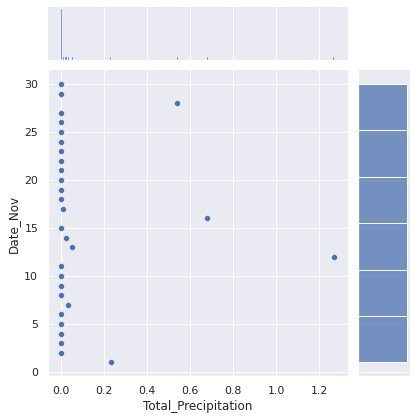

In [ ]:
import seaborn as sns
sns.set(color_codes=True)
sns.jointplot(x= "Total_Precipitation", y= "Date_Nov", data=df)

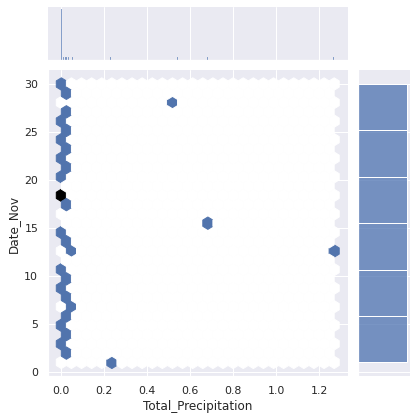

In [ ]:
import seaborn as sns
sns.set(color_codes=True)
sns.jointplot(x= "Total_Precipitation", y= "Date_Nov", data=df, kind= 'hex');

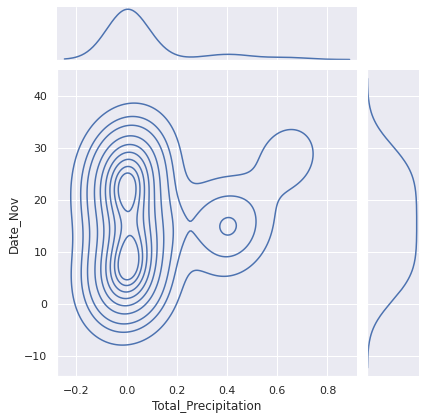

In [ ]:
import seaborn as sns
sns.set(color_codes=True)
sns.jointplot(x= "Total_Precipitation", y= "Date_Nov", data=df, kind= 'kde');

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


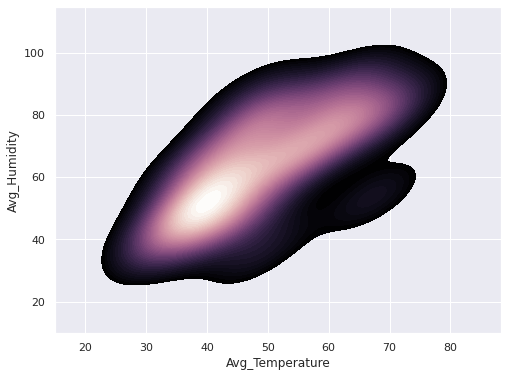

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.Avg_Temperature,df.Avg_Humidity, cmap=cmap, n_levels=60, shade=True)

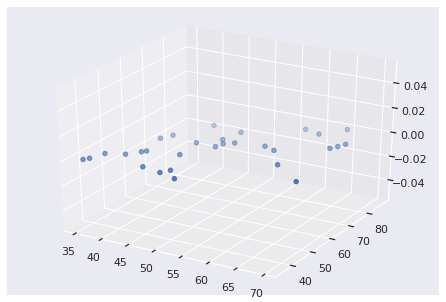

In [ ]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

font = {'size': 8}
plt.rc('font', **font)

fig = plt.figure()
three_d_plot = Axes3D(fig)
three_d_plot.scatter(df.Avg_Temperature,df.Avg_Humidity)
plt.show()

In [ ]:
data = pd.read_csv("/content/NewYork_form_response.csv") 

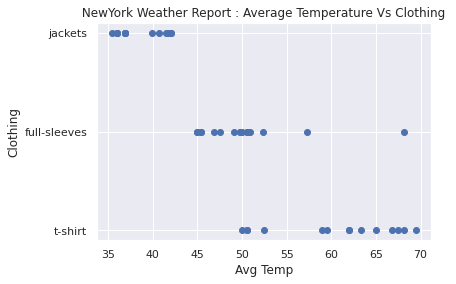

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df.Avg_Temperature, df.clothing)
plt.title(' NewYork Weather Report : Average Temperature Vs Clothing ')
plt.xlabel('Avg Temp')
plt.ylabel('Clothing')
plt.show()

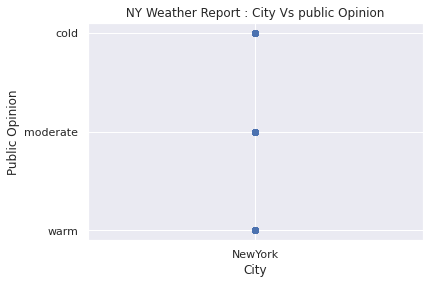

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df.City, df.public_opinion)
plt.title(' NY Weather Report : City Vs public Opinion ')
plt.xlabel('City')
plt.ylabel('Public Opinion')
plt.show()

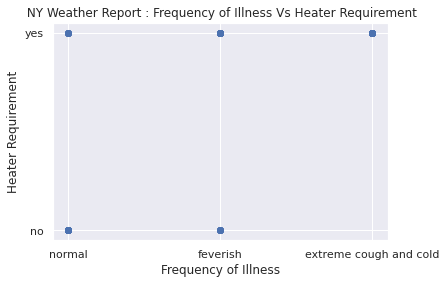

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df.frequency_illness, df.heater_req)
plt.title(' NY Weather Report : Frequency of Illness Vs Heater Requirement')
plt.xlabel('Frequency of Illness')
plt.ylabel('Heater Requirement')
plt.show()

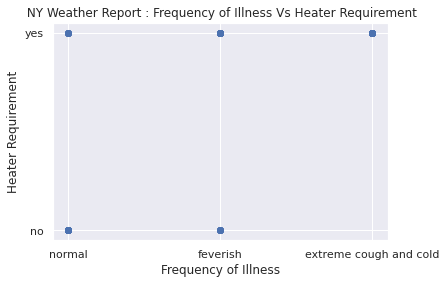

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df.frequency_illness, df.heater_req)
plt.title(' NY Weather Report : Frequency of Illness Vs Heater Requirement')
plt.xlabel('Frequency of Illness')
plt.ylabel('Heater Requirement')
plt.show()

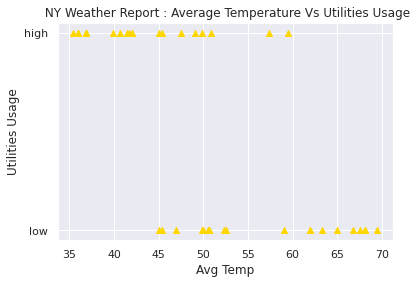

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df.Avg_Temperature, df.gas_electricity_usage, color='gold', marker= '^')
plt.title(' NY Weather Report : Average Temperature Vs Utilities Usage')
plt.xlabel('Avg Temp')
plt.ylabel('Utilities Usage')
plt.show()

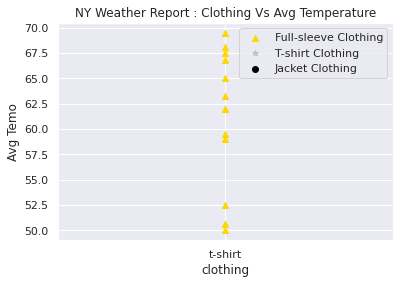

In [ ]:
df_fullsleeve = df[df['clothing'] == 't-shirt']
df_tshirt = df[df['clothing'] == 'full-sleeve']
df_jacket = df[df['clothing'] == 'jacket']

plt.scatter(df_fullsleeve.clothing, df_fullsleeve.Avg_Temperature, label='Full-sleeve Clothing', color='gold', marker= '^')
plt.scatter(df_tshirt.clothing, df_tshirt.Avg_Temperature, label='T-shirt Clothing', color='silver', marker= '*')
plt.scatter(df_jacket.clothing, df_jacket.Avg_Temperature, label='Jacket Clothing', color='black', marker= 'o')
plt.title('NY Weather Report : Clothing Vs Avg Temperature')
plt.xlabel('clothing')
plt.ylabel('Avg Temo')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/NewYork_Weather_Nov22.csv")

In [ ]:
df=data

In [ ]:
corelation = df.corr()

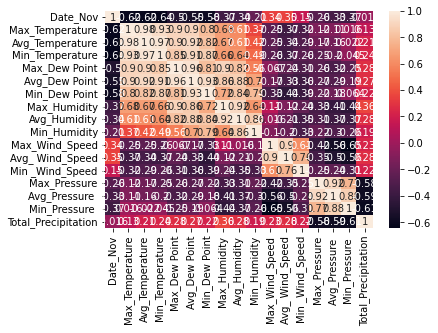

In [ ]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

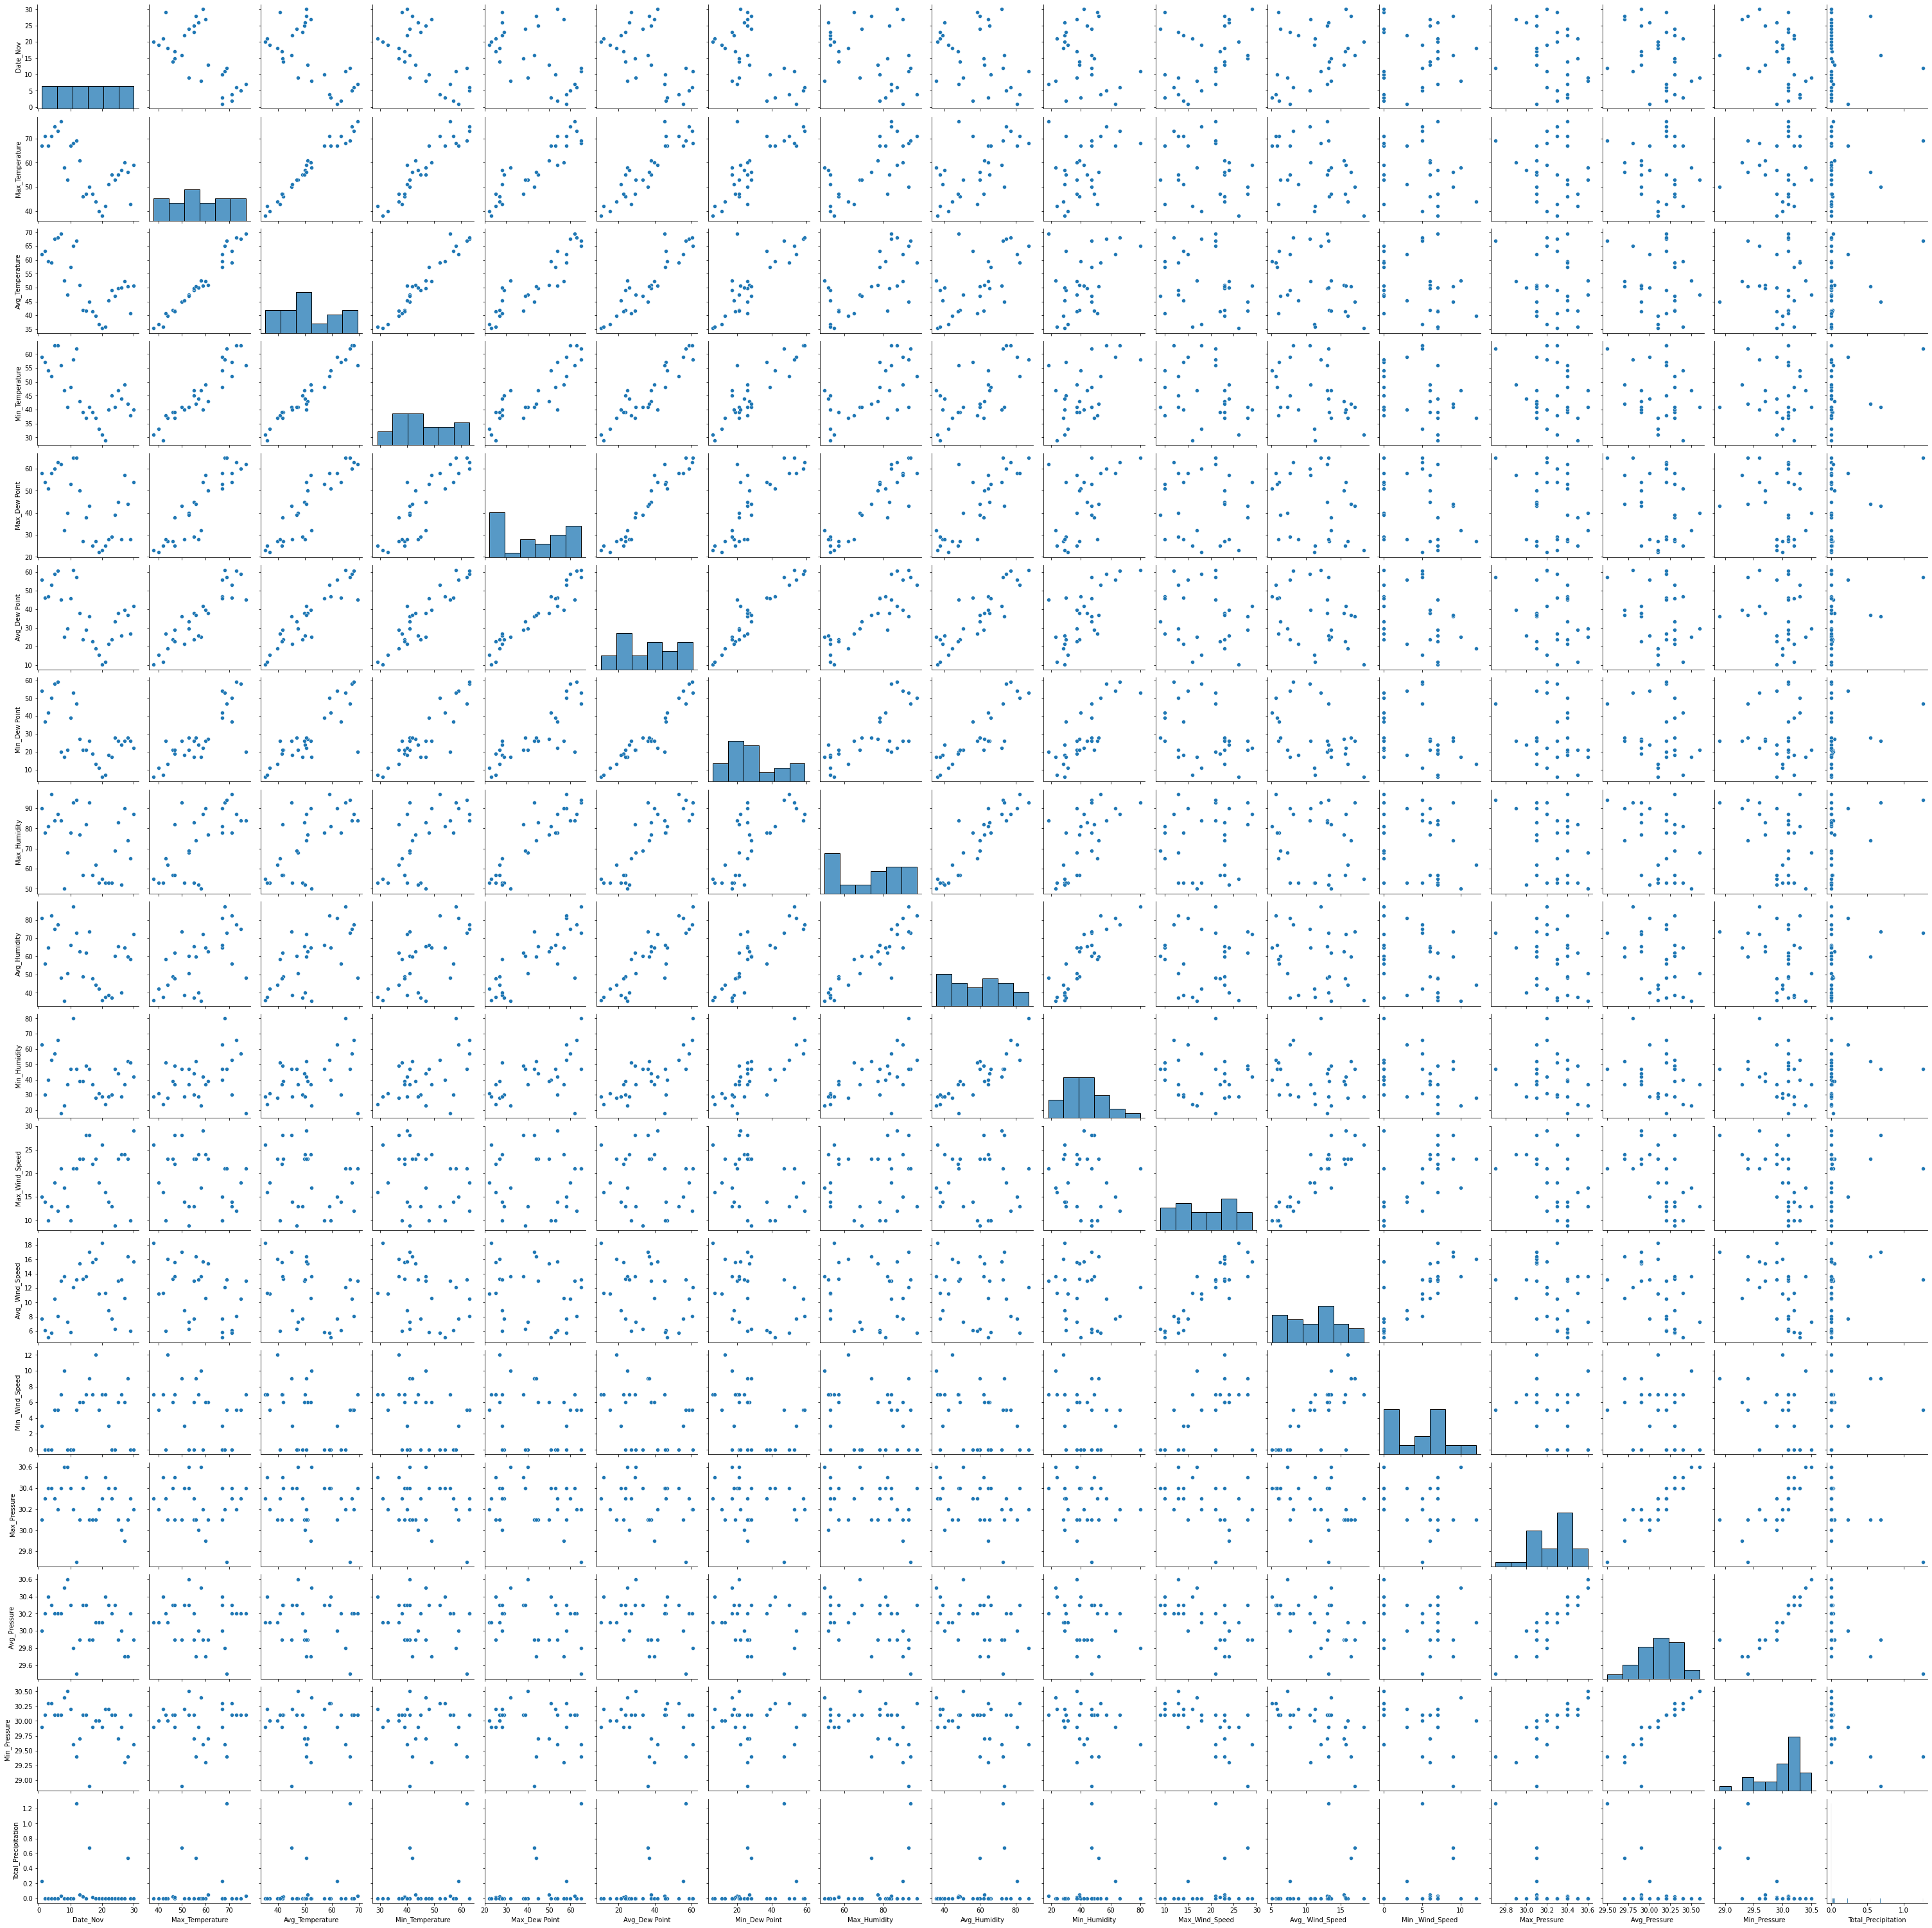

In [ ]:
sns.pairplot(df)

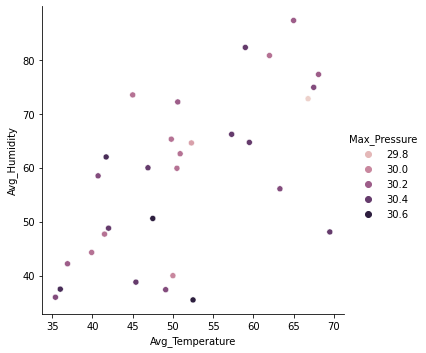

In [ ]:
sns.relplot(x= 'Avg_Temperature',y='Avg_Humidity', hue='Max_Pressure',data=df)

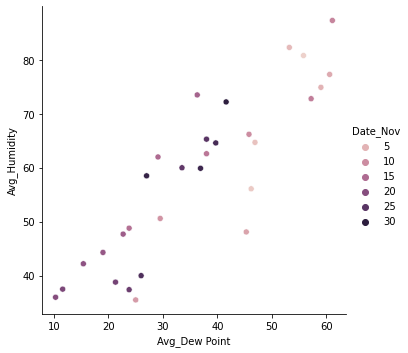

In [ ]:
sns.relplot(x= 'Avg_Dew Point',y='Avg_Humidity', hue='Date_Nov',data=df)

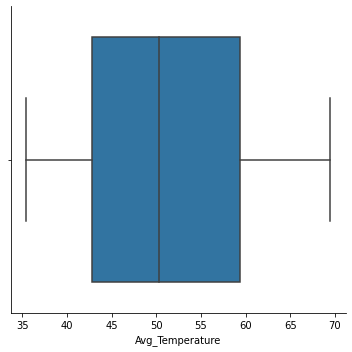

In [ ]:
sns.catplot(x='Avg_Temperature', kind='box', data=df)

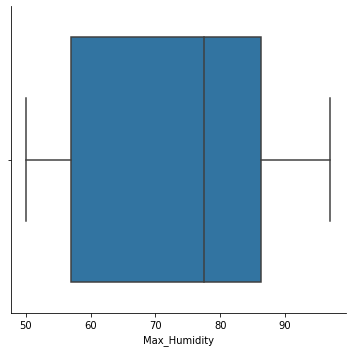

In [ ]:
sns.catplot(x='Max_Humidity', kind='box', data=df)